In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import norm, skew

from sklearn.model_selection import train_test_split # 4.1
from sklearn.linear_model import LogisticRegression  # 4.2
from sklearn.ensemble import RandomForestClassifier  # 4.3
from sklearn.naive_bayes import GaussianNB           # 4.4
from sklearn.neighbors import KNeighborsClassifier   # 4.5
from sklearn.svm import SVC                          # 4.6
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

%config InlineBackend.figure_format = 'retina'

# Model Accuracies
ml_accuracies = dict()

In [13]:
colors = ['tomato',
          'indigo',
          'aquamarine',
          'chocolate',
          'orchid',
          'chartreuse',
          'cornflowerblue',
          'hotpink',
          'goldenrod',
          'firebrick',
          'skyblue',
          'palevioletred',
          'seagreen',
          'darkkhaki',
          'dodgerblue',
          'forestgreen',
          'mediumpurple',
          'darkred',
          'cadetblue',
          'darkcyan',
          'sienna',
          'darkslategray',
          'plum',
          'turquoise']


In [14]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("cancer patient data sets.csv")

# Index Column now refers to patient
df.drop("Patient Id", axis=1, inplace=True)

# Cleaning column names
df.rename(columns=str.lower, inplace=True)
df.rename(columns=lambda col: col.replace(" ", "_"), inplace=True)

# Display the dataframe
display(df)


index  age  gender  air_pollution  alcohol_use  dust_allergy  \
0        0   33       1              2            4             5   
1        1   17       1              3            1             5   
2        2   35       1              4            5             6   
3        3   37       1              7            7             7   
4        4   46       1              6            8             7   
..     ...  ...     ...            ...          ...           ...   
995    995   44       1              6            7             7   
996    996   37       2              6            8             7   
997    997   25       2              4            5             6   
998    998   18       2              6            8             7   
999    999   47       1              6            5             6   

     occupational_hazards  genetic_risk  chronic_lung_disease  balanced_diet  \
0                       4             3                     2              2   
1                       3             4                     2              2   
2                       5             5                     4              6   
3                       7             6                     7              7   
4                       7             7                     6              7   
..                    ...           ...                   ...            ...   
995                     7             7                     6              7   
996                     7             7                     6              7   
997                     5             5                     4              6   
998                     7             7                     6              7   
999                     5             5                     4              6   

     ...  fatigue  weight_loss  shortness_of_breath  wheezing  \
0    ...        3            4                    2         2   
1    ...        1            3                    7         8   
2    ...        8            7                    9         2   
3    ...        4            2                    3         1   
4    ...        3            2                    4         1   
..   ...      ...          ...                  ...       ...   
995  ...        5            3                    2         7   
996  ...        9            6                    5         7   
997  ...        8            7                    9         2   
998  ...        3            2                    4         1   
999  ...        8            7                    9         2   

     swallowing_difficulty  clubbing_of_finger_nails  frequent_cold  \
0                        3                         1              2   
1                        6                         2              1   
2                        1                         4              6   
3                        4                         5              6   
4                        4                         2              4   
..                     ...                       ...            ...   
995                      8                         2              4   
996                      2                         4              3   
997                      1                         4              6   
998                      4                         2              4   
999                      1                         4              6   

     dry_cough  snoring   level  
0            3        4     Low  
1            7        2  Medium  
2            7        2    High  
3            7        5    High  
4            2        3    High  
..         ...      ...     ...  
995          5        3    High  
996          1        4    High  
997          7        2    High  
998          2        3    High  
999          7        2    High  

[1000 rows x 25 columns]

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   age                       1000 non-null   int64 
 2   gender                    1000 non-null   int64 
 3   air_pollution             1000 non-null   int64 
 4   alcohol_use               1000 non-null   int64 
 5   dust_allergy              1000 non-null   int64 
 6   occupational_hazards      1000 non-null   int64 
 7   genetic_risk              1000 non-null   int64 
 8   chronic_lung_disease      1000 non-null   int64 
 9   balanced_diet             1000 non-null   int64 
 10  obesity                   1000 non-null   int64 
 11  smoking                   1000 non-null   int64 
 12  passive_smoker            1000 non-null   int64 
 13  chest_pain                1000 non-null   int64 
 14  coughing_of_blood        

In [16]:
print('Cancer Levels: ', df['level'].unique())

# Replacing levels of numeric int
mapping = {'High': 2, 'Medium': 1, 'Low': 0}
df["level"].replace(mapping, inplace=True)
print('Cancer Levels: ', df['level'].unique())

Cancer Levels:  ['Low' 'Medium' 'High']
Cancer Levels:  [0 1 2]


C:\Users\lenovo\AppData\Local\Temp\ipykernel_21484\2384082607.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["level"].replace(mapping, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_21484\2384082607.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["level"].replace(mapping, 

In [17]:
round(df.describe().iloc[1:].T, 3).style.format("{:.3f}").background_gradient(axis=0)


In [18]:
X = df.drop(columns='level')
y = df.level

display(X.head())
print(y[:5])

index  age  gender  air_pollution  alcohol_use  dust_allergy  \
0      0   33       1              2            4             5   
1      1   17       1              3            1             5   
2      2   35       1              4            5             6   
3      3   37       1              7            7             7   
4      4   46       1              6            8             7   

   occupational_hazards  genetic_risk  chronic_lung_disease  balanced_diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   ...  coughing_of_blood  fatigue  weight_loss  shortness_of_breath  \
0  ...                  4        3            4                    2   
1  ...                  3        1            3                    7   
2  ...                  8        8            7                    9   
3  ...                  8        4            2                    3   
4  ...                  9        3            2                    4   

   wheezing  swallowing_difficulty  clubbing_of_finger_nails  frequent_cold  \
0         2                      3                         1              2   
1         8                      6                         2              1   
2         2                      1                         4              6   
3         1                      4                         5              6   
4         1                      4                         2              4   

   dry_cough  snoring  
0          3        4  
1          7        2  
2          7        2  
3          7        5  
4          2        3  

[5 rows x 24 columns]

0    0
1    1
2    2
3    2
4    2
Name: level, dtype: int64


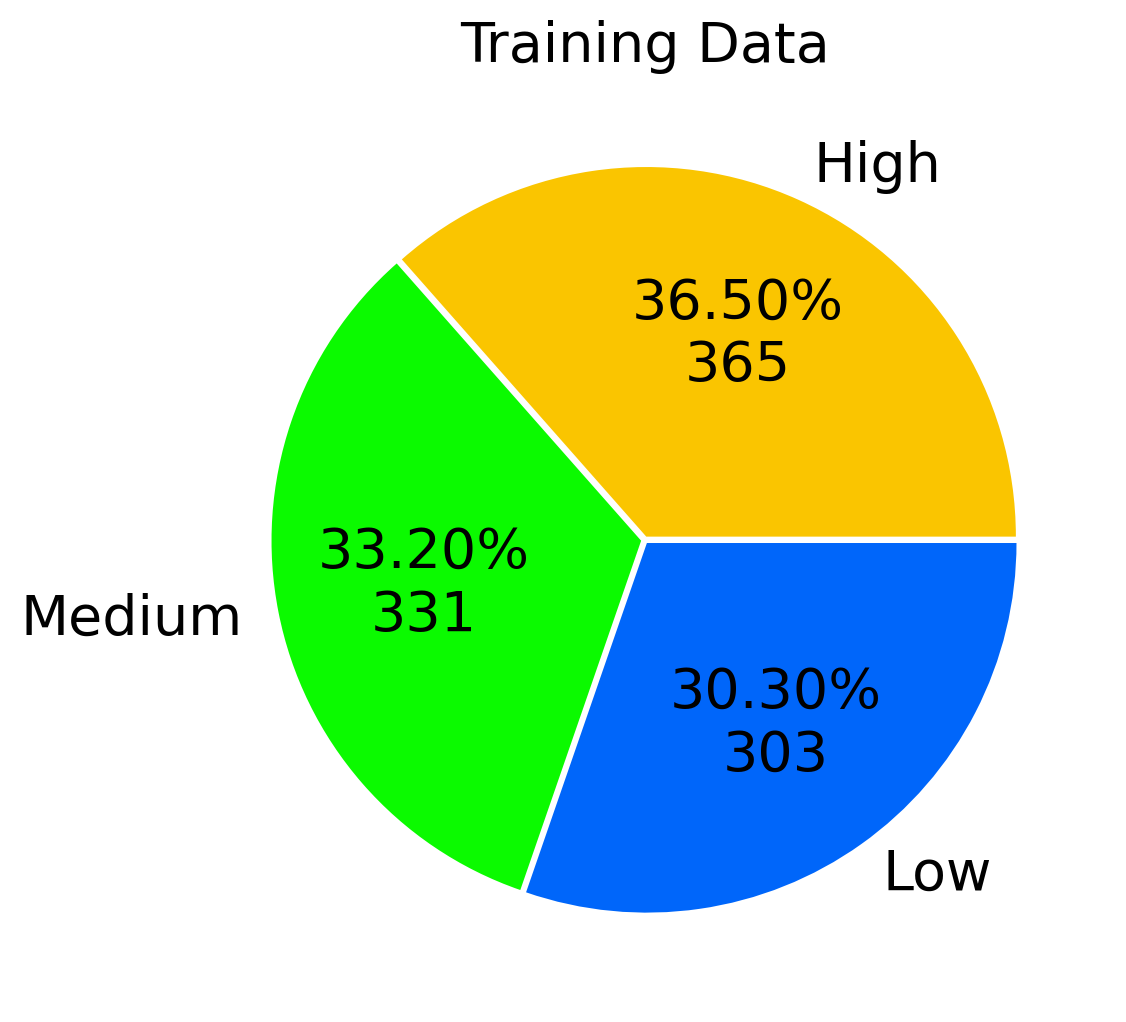

In [19]:
plt.figure(figsize=(6, 6))
plt.title('Training Data', fontsize=20)

values = df['level'].value_counts()  # Explicitly store value counts
labels = list(mapping.keys())  # Ensure labels are a list

plt.pie(
    values,
    labels=labels,
    colors=['#FAC500', '#0BFA00', '#0066FA', '#FA0000'],  # Keeping colors the same
    autopct=lambda p: f'{p:.2f}%\n{int(p * values.sum() / 100)}',  # Minor tweak for clarity
    explode=[0.01] * len(labels),  # Generate explode dynamically
    textprops={'fontsize': 20}
)

plt.show()


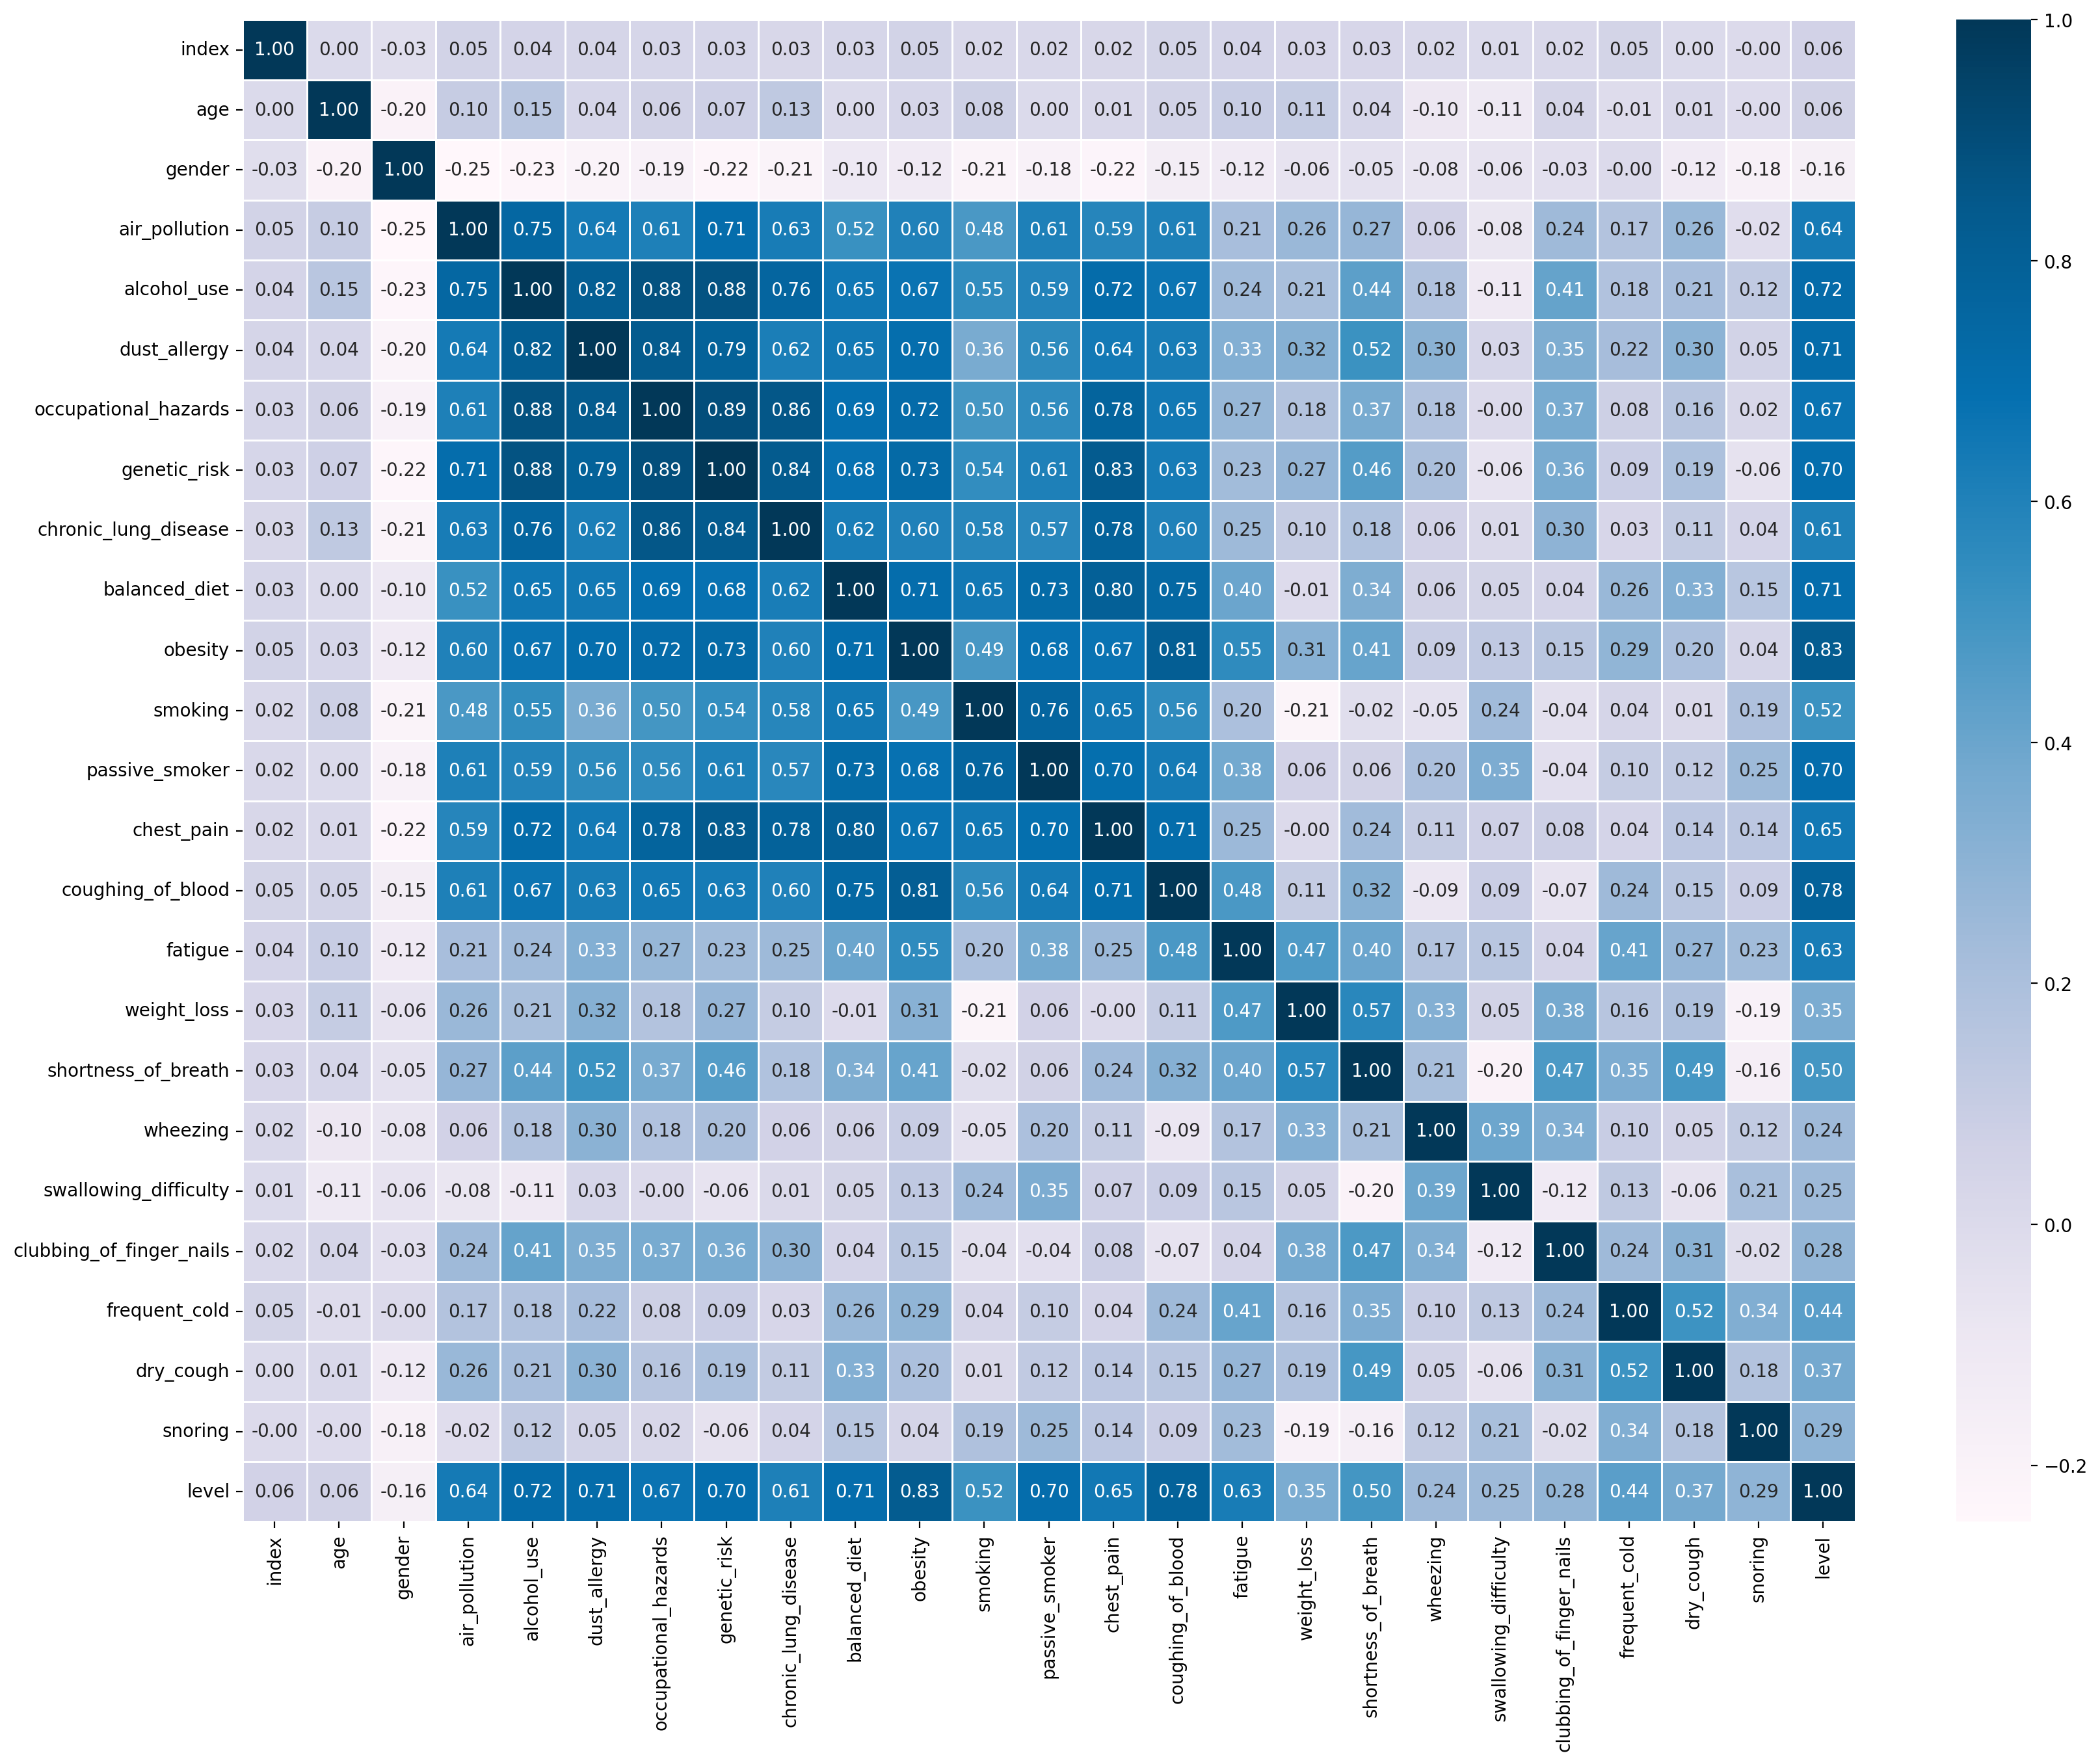

In [20]:
plt.figure(figsize=(20, 15))
sns.heatmap(
    df.corr(),
    annot=True,
    cmap="PuBu",
    fmt=".2f",
    linewidths=0.5
)
plt.show()


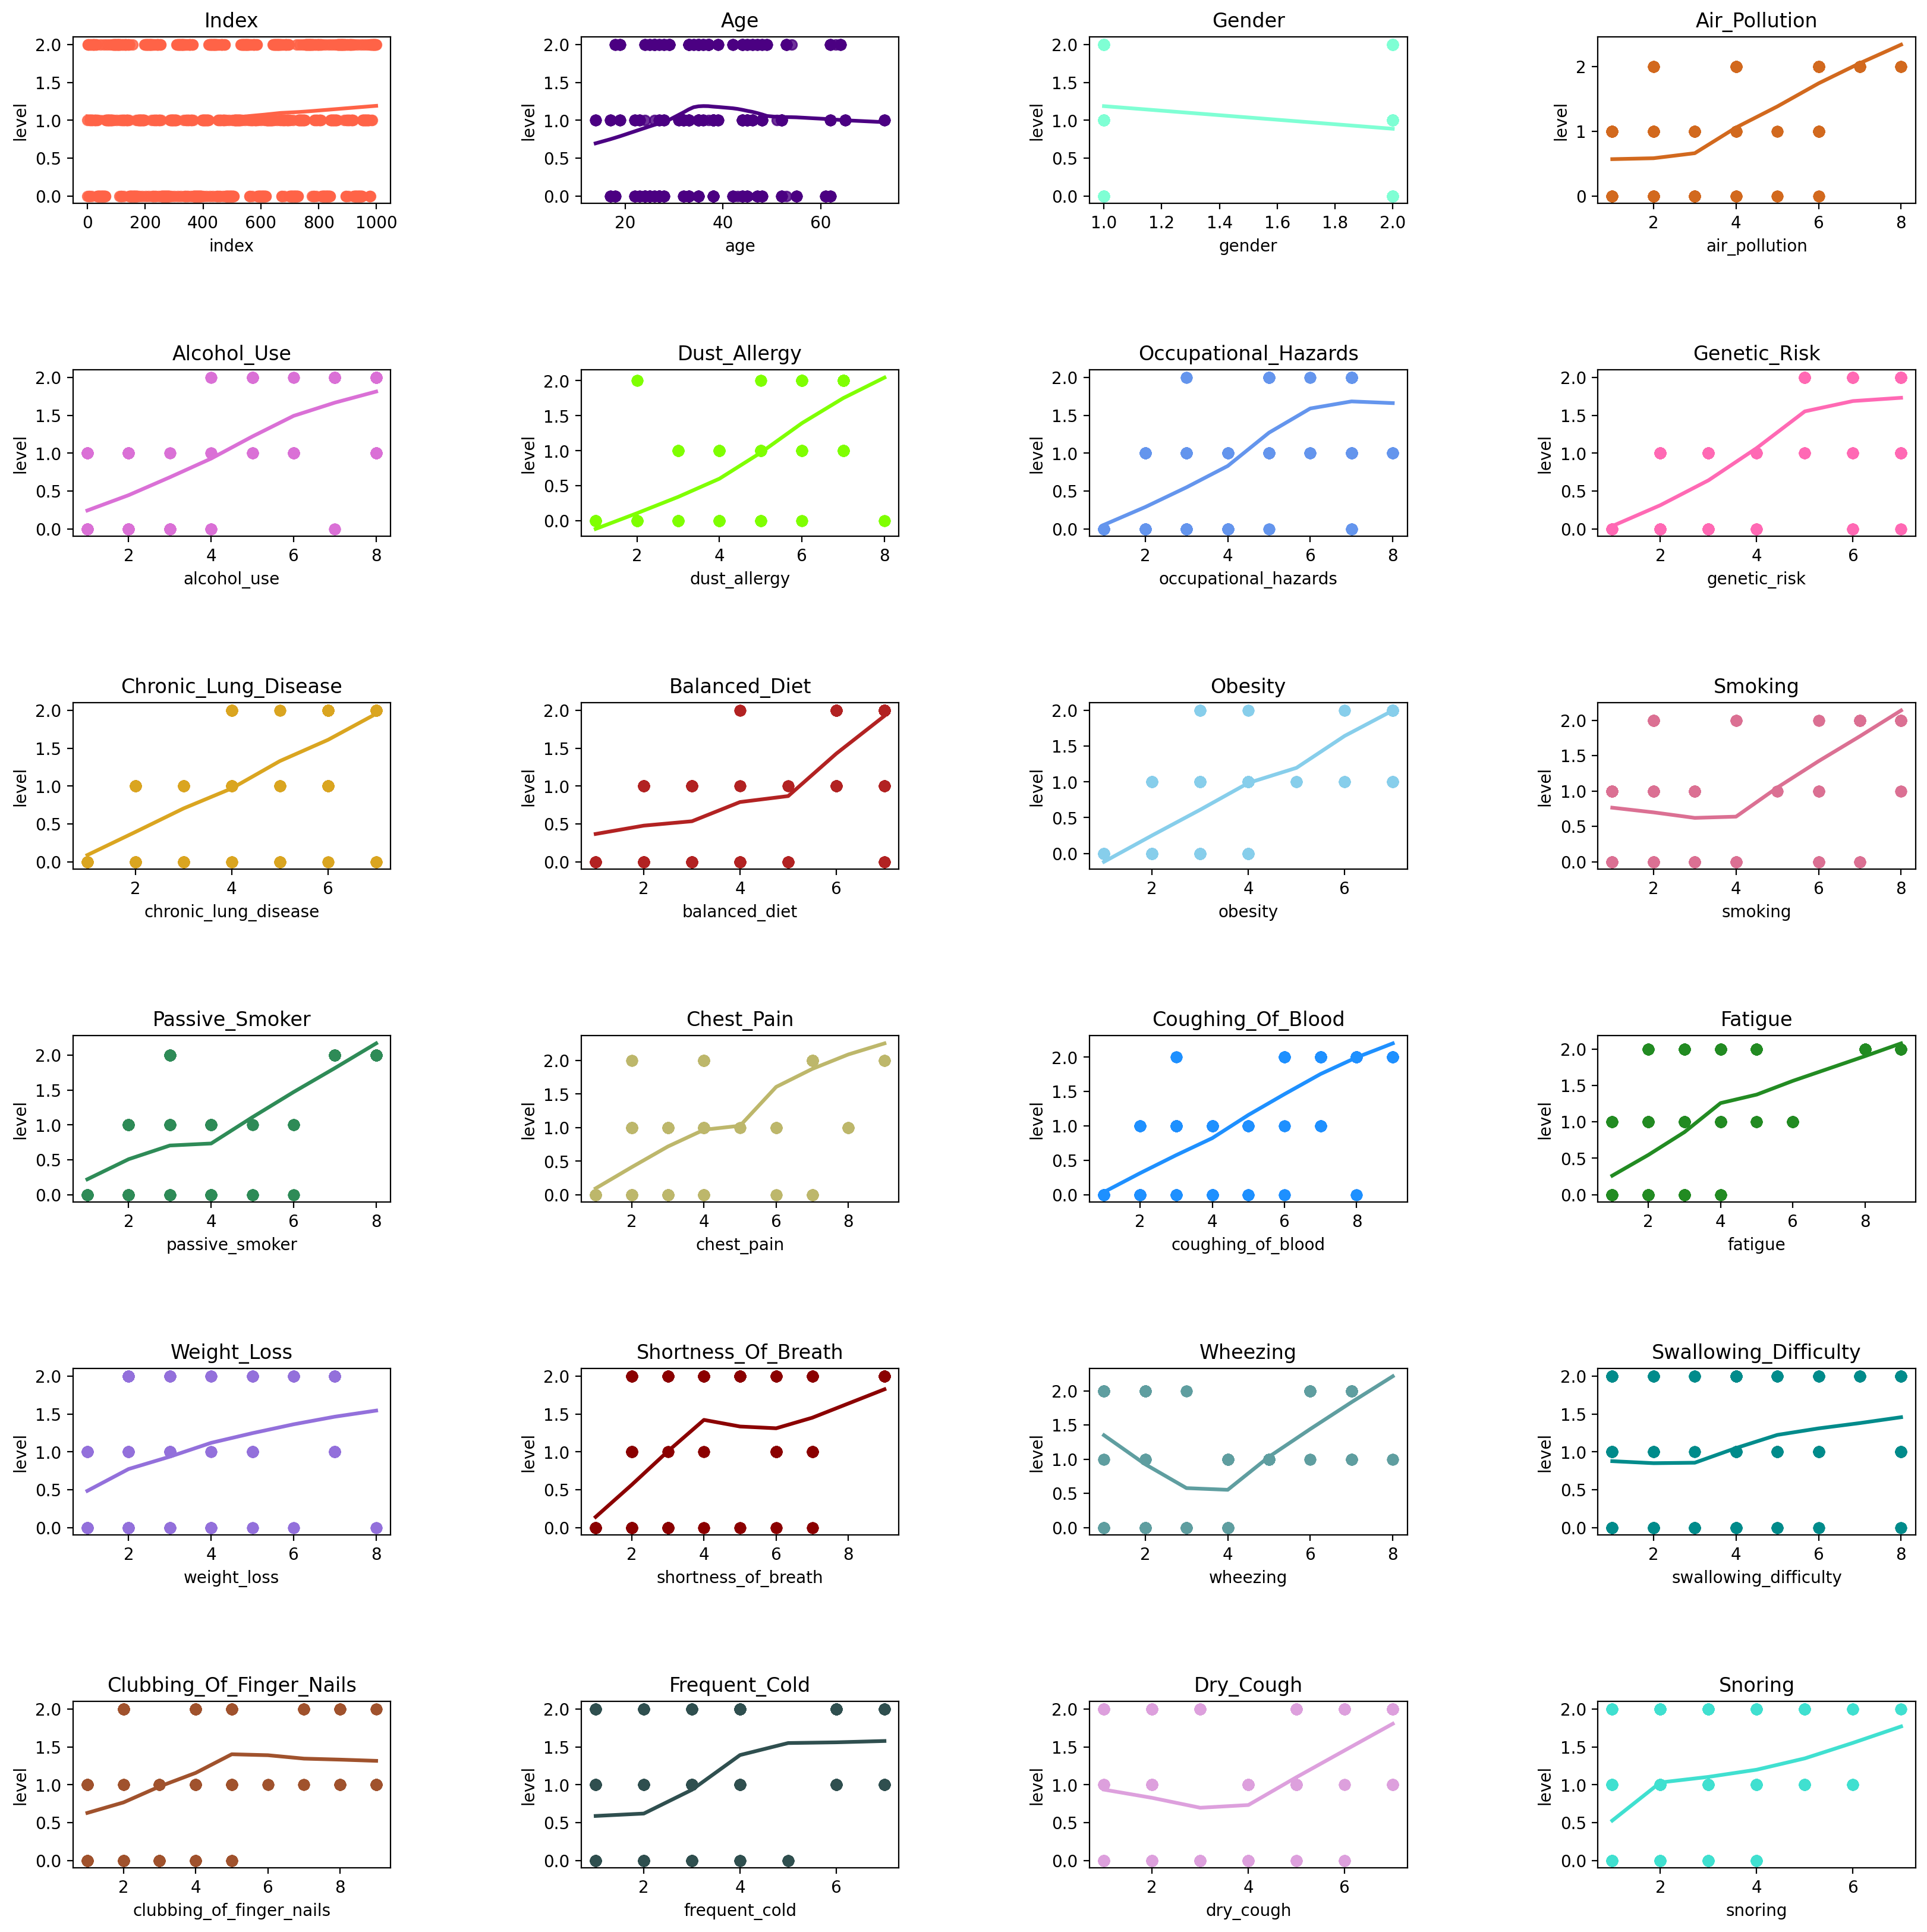

In [21]:
fig, ax = plt.subplots(ncols=4, nrows=6, figsize=(20, 20))
ax = ax.flatten()

for i, (col, color) in enumerate(zip(df.columns, colors)):  # Combined `zip` for clarity
    sns.regplot(
        x=col,
        y='level',
        data=df,
        lowess=True,
        color=color,
        ax=ax[i]
    )
    ax[i].set_title(f'{col.title()}')  # f-string for consistency

plt.subplots_adjust(hspace=1, wspace=0.6)  # Adjusted spacing more clearly
plt.show()


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print(f'Shapes - X Training: {X_train.shape} and X Testing {X_test.shape}')
print(f'Shapes - Y Training: {y_train.shape} and Y Testing {y_test.shape}')

print(f'\nTraining output counts\n{y_train.value_counts()}')

Shapes - X Training: (700, 24) and X Testing (300, 24)
Shapes - Y Training: (700,) and Y Testing (300,)

Training output counts
level
2    248
1    233
0    219
Name: count, dtype: int64


In [23]:
MR = LogisticRegression(multi_class='multinomial', solver='newton-cg', random_state=40)


MR.fit(X_train, y_train)

# predicting with model
MR_pred = MR.predict(X_test)

# Printing model coefficents
print('Intercept: \n', MR.intercept_)
print('Coefficients: \n', MR.coef_)

Intercept: 
 [ 36.68390893  -0.72025961 -35.96364932]
Coefficients: 
 [[-3.18282495e-05 -3.67862637e-02  7.44566030e-02 -1.45088697e-01
  -4.11685519e-01 -2.88409135e-01  3.03858580e-02 -4.64513254e-01
  -2.14709775e-01 -3.13074737e-02 -1.01753868e+00 -2.73843724e-02
  -9.14142686e-01  2.87549396e-01 -8.34114430e-01 -7.45424942e-01
   3.70075480e-02 -2.35234739e-01 -9.04875691e-01 -8.01853993e-01
  -7.73750723e-01 -6.42228208e-01 -5.22870473e-01 -7.03238638e-01]
 [ 1.60687037e-05  4.32132523e-02 -1.35790413e-01 -3.29870593e-01
  -1.95931989e-01  4.27057885e-01 -2.27859525e-02  2.29914688e-01
  -1.39182251e-01 -3.01590246e-01  5.21674713e-01 -8.26283638e-02
   1.09435720e-01 -3.47871069e-01 -3.83765050e-03 -9.68128242e-02
  -4.12258292e-01 -2.41568858e-01  7.28560373e-01 -4.22542414e-02
   3.43735277e-01  2.15818098e-01  1.32133060e-01  4.19321783e-01]
 [ 1.57595470e-05 -6.42698860e-03  6.13338097e-02  4.74959290e-01
   6.07617508e-01 -1.38648750e-01 -7.59990548e-03  2.34598566e-01
   3

In [24]:
def CM(y_test, y_pred_test, col_names, title='', cmap=plt.cm.Blues):

    # Forming confusion matrix
    CM = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(9,7))
    sns.heatmap(CM, annot=True, annot_kws={'size':15}, fmt=".0f", cmap=cmap, linewidths=5)

    # labels in plot
    tick_marks = np.arange(len(col_names))
    plt.xticks(tick_marks + 0.5, col_names)
    plt.yticks(tick_marks + 0.5, col_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix ' + title)
    plt.show()

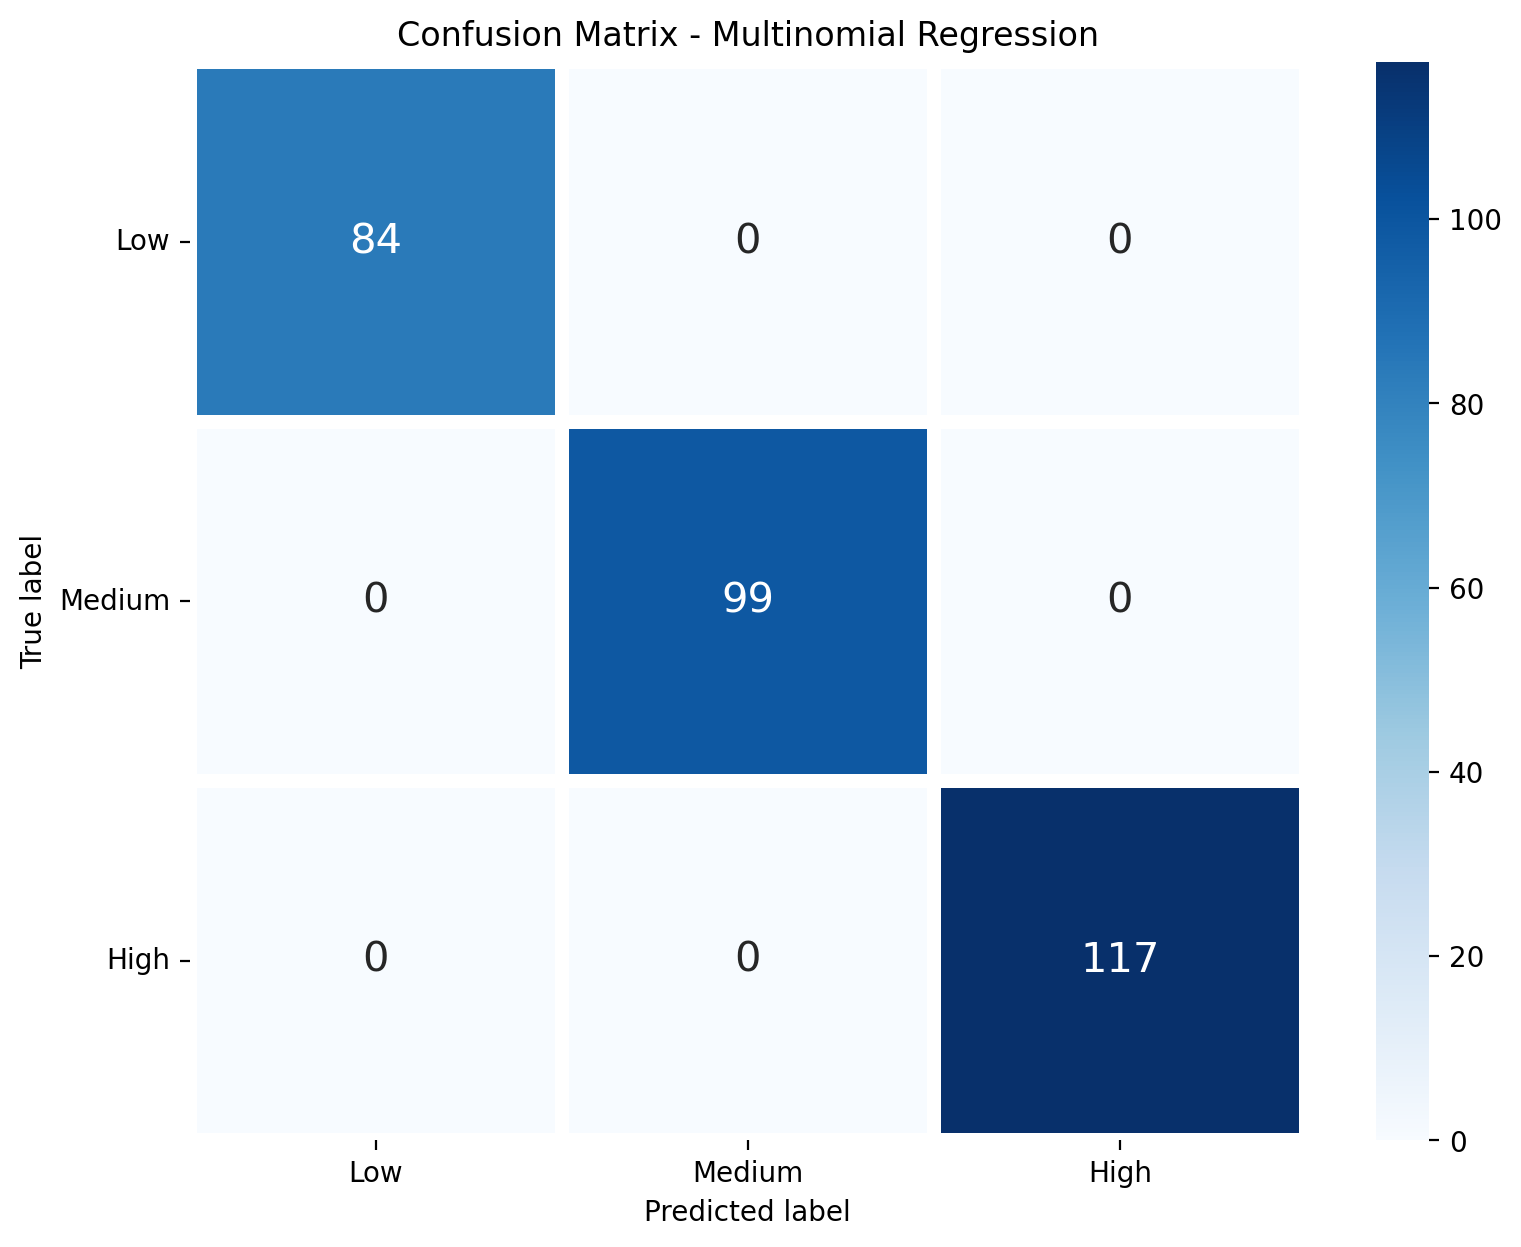

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [25]:
CM(y_test, MR_pred, col_names=['Low', 'Medium', 'High'], title='- Multinomial Regression')

# Model report
ml_accuracies['Multinomial Model'] = accuracy_score(y_test, MR_pred)
print(classification_report(y_test, MR_pred))

In [26]:
random_forest_n_best(X_train, y_train, X_test, y_test, n_list=np.arange(1,20,1))

NameError: name 'random_forest_n_best' is not defined

In [5]:
def random_forest_n_best(X_train, y_train, X_test, y_test, n_list):

    scores = []

    for n in n_list:
        RF = RandomForestClassifier(n_estimators=n, random_state=40)
        RF.fit(X_train, y_train)
        RF_pred = RF.predict(X_test)

        scores.append(accuracy_score(y_test, RF_pred))

    plt.plot(n_list, scores)
    plt.xlabel('Value of n_estimators for Random Forest Classifier')
    plt.ylabel('Testing Accuracy')
    plt.grid(alpha=0.1)
    plt.show()


In [25]:
RF = RandomForestClassifier(n_estimators=3, random_state=40)

# fitting model
RF.fit(X_train, y_train)

# predicting with model
RF_pred = RF.predict(X_test)
pd.Series(RF_pred).value_counts()

2    117
1     99
0     84
Name: count, dtype: int64

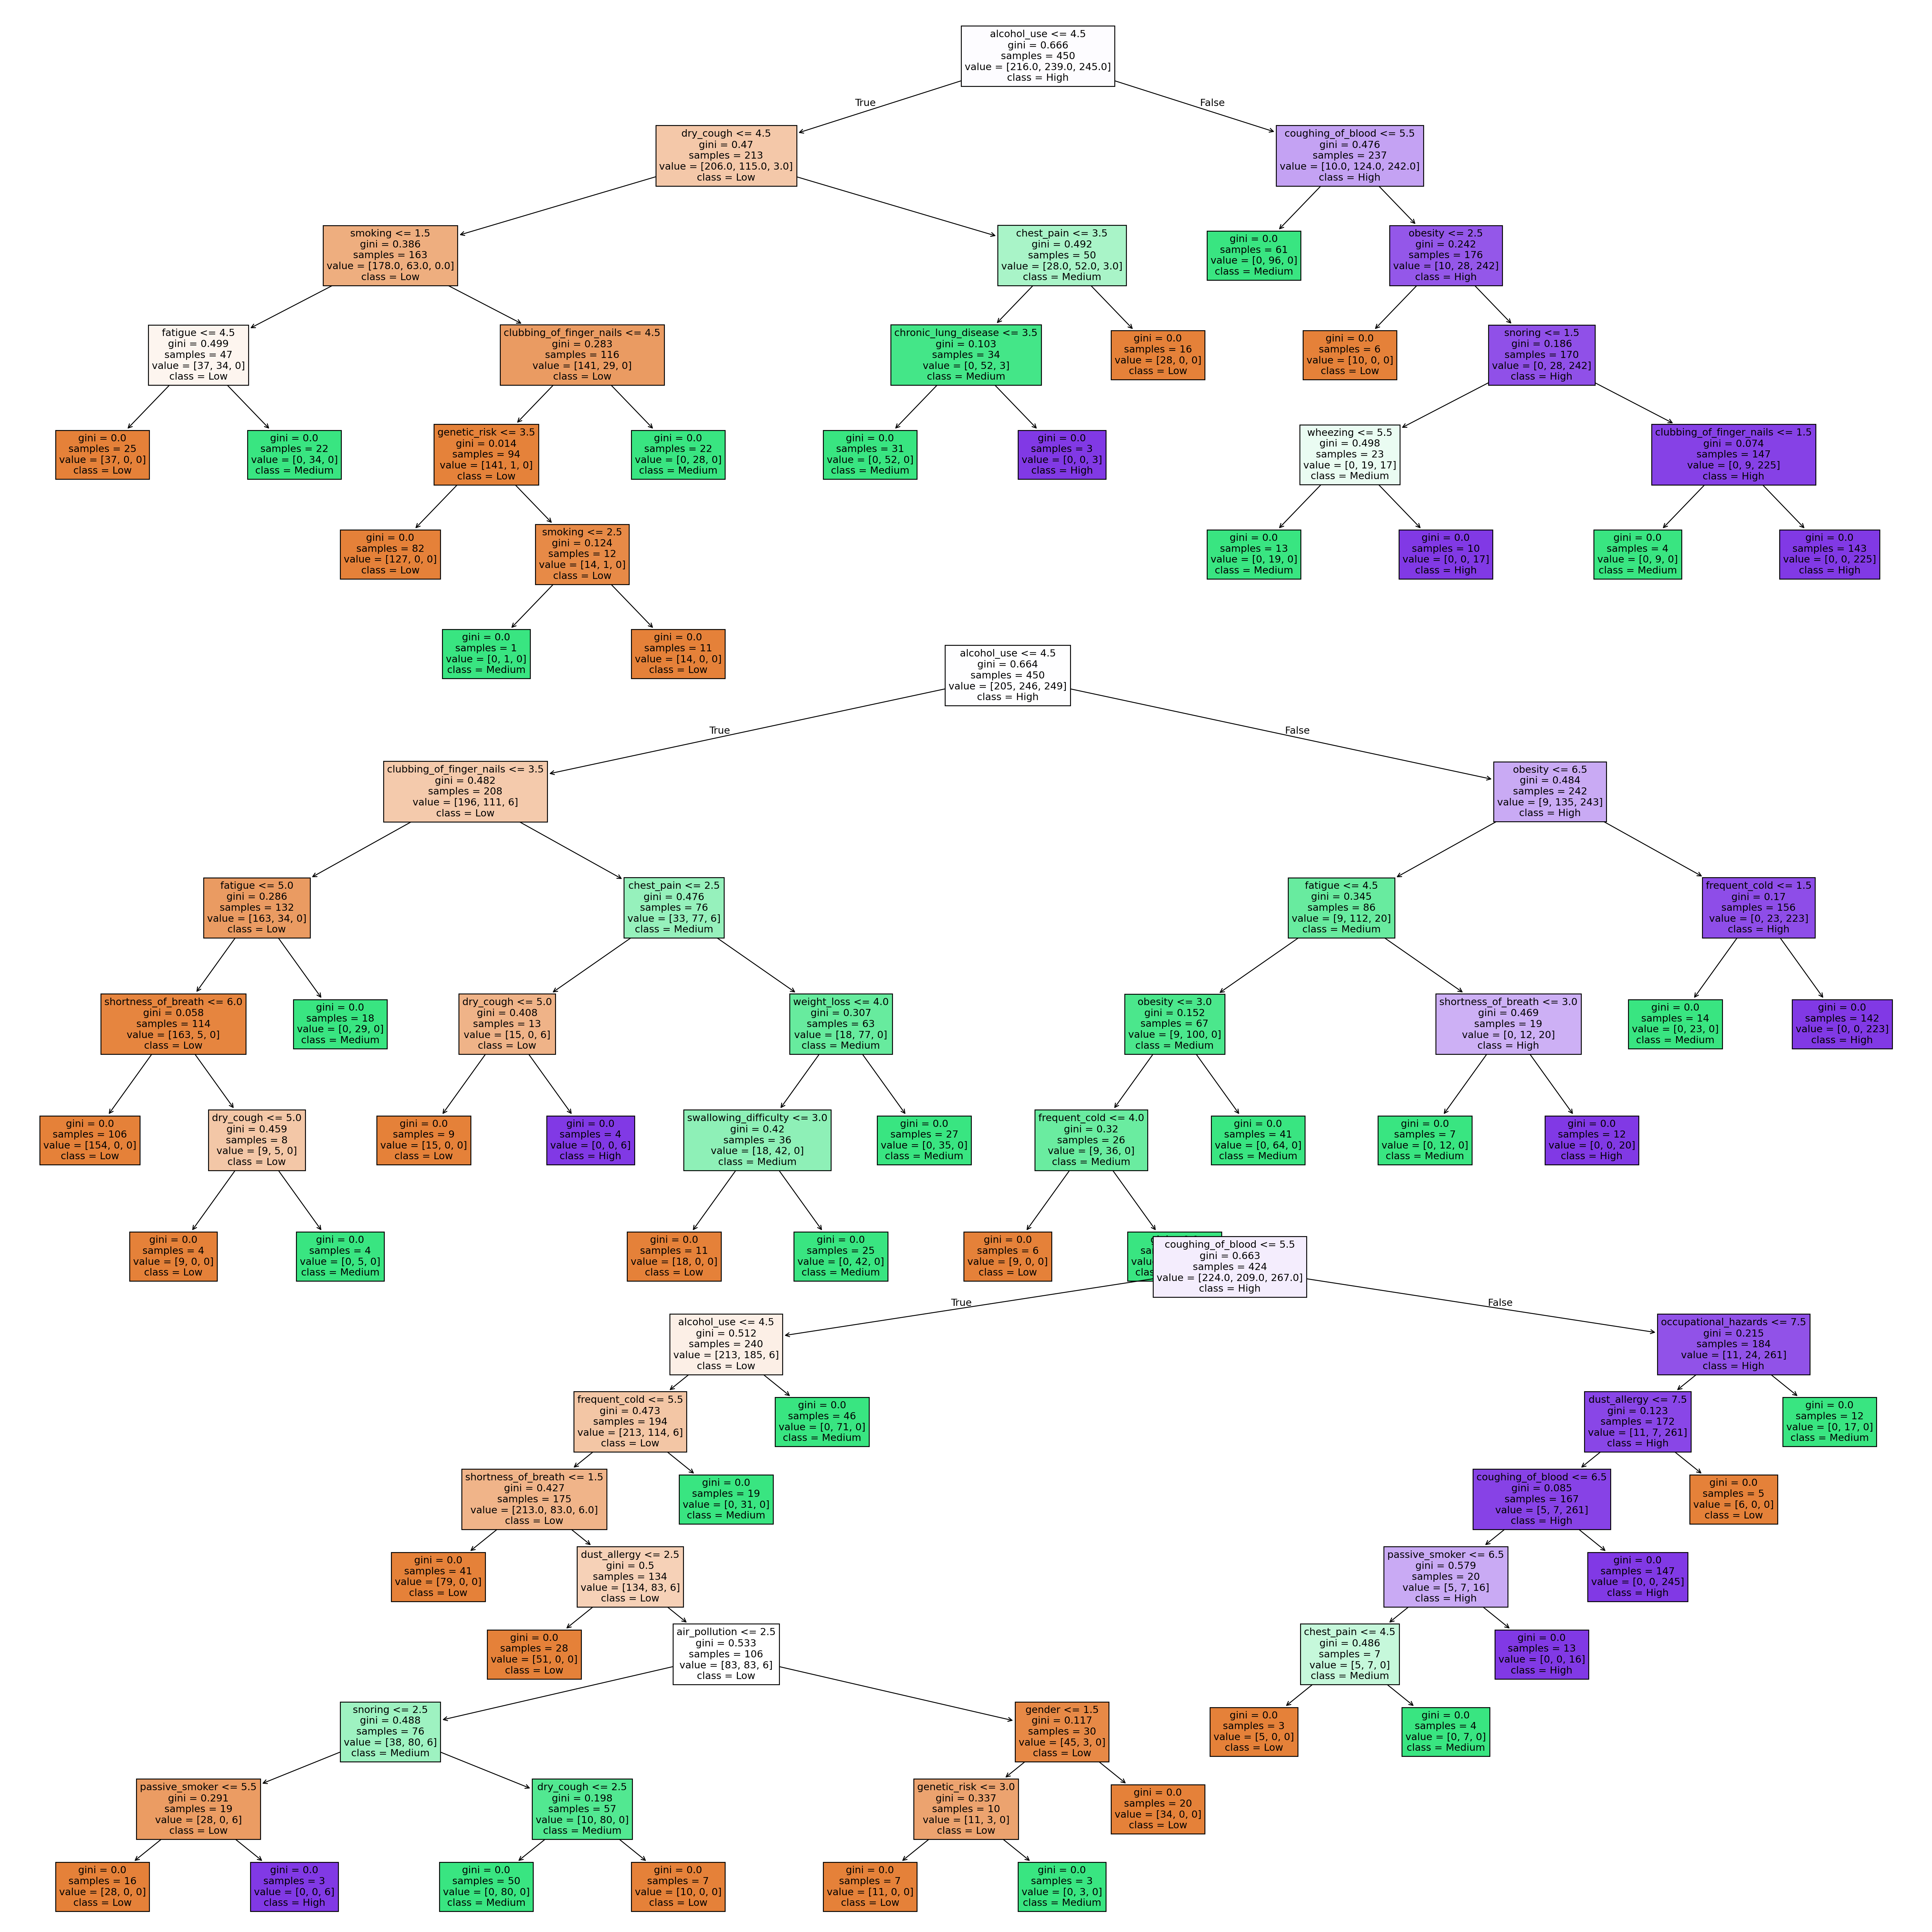

In [26]:
from sklearn import tree

trees = len(RF.estimators_)
cn = ['Low', 'Medium', 'High']

fig, ax = plt.subplots(trees, 1, figsize=(30,10*trees))

for i, forest in enumerate(RF.estimators_):
    if trees > 1:
        tree.plot_tree(forest,
                       feature_names=X.columns,
                       class_names=cn,
                       filled=True,
                       fontsize=11,
                       ax=ax[i])
    else:
        tree.plot_tree(forest,
                       feature_names=X.columns,
                       class_names=cn,
                       filled=True,
                       fontsize=11)

plt.tight_layout(h_pad=-10)
plt.show()

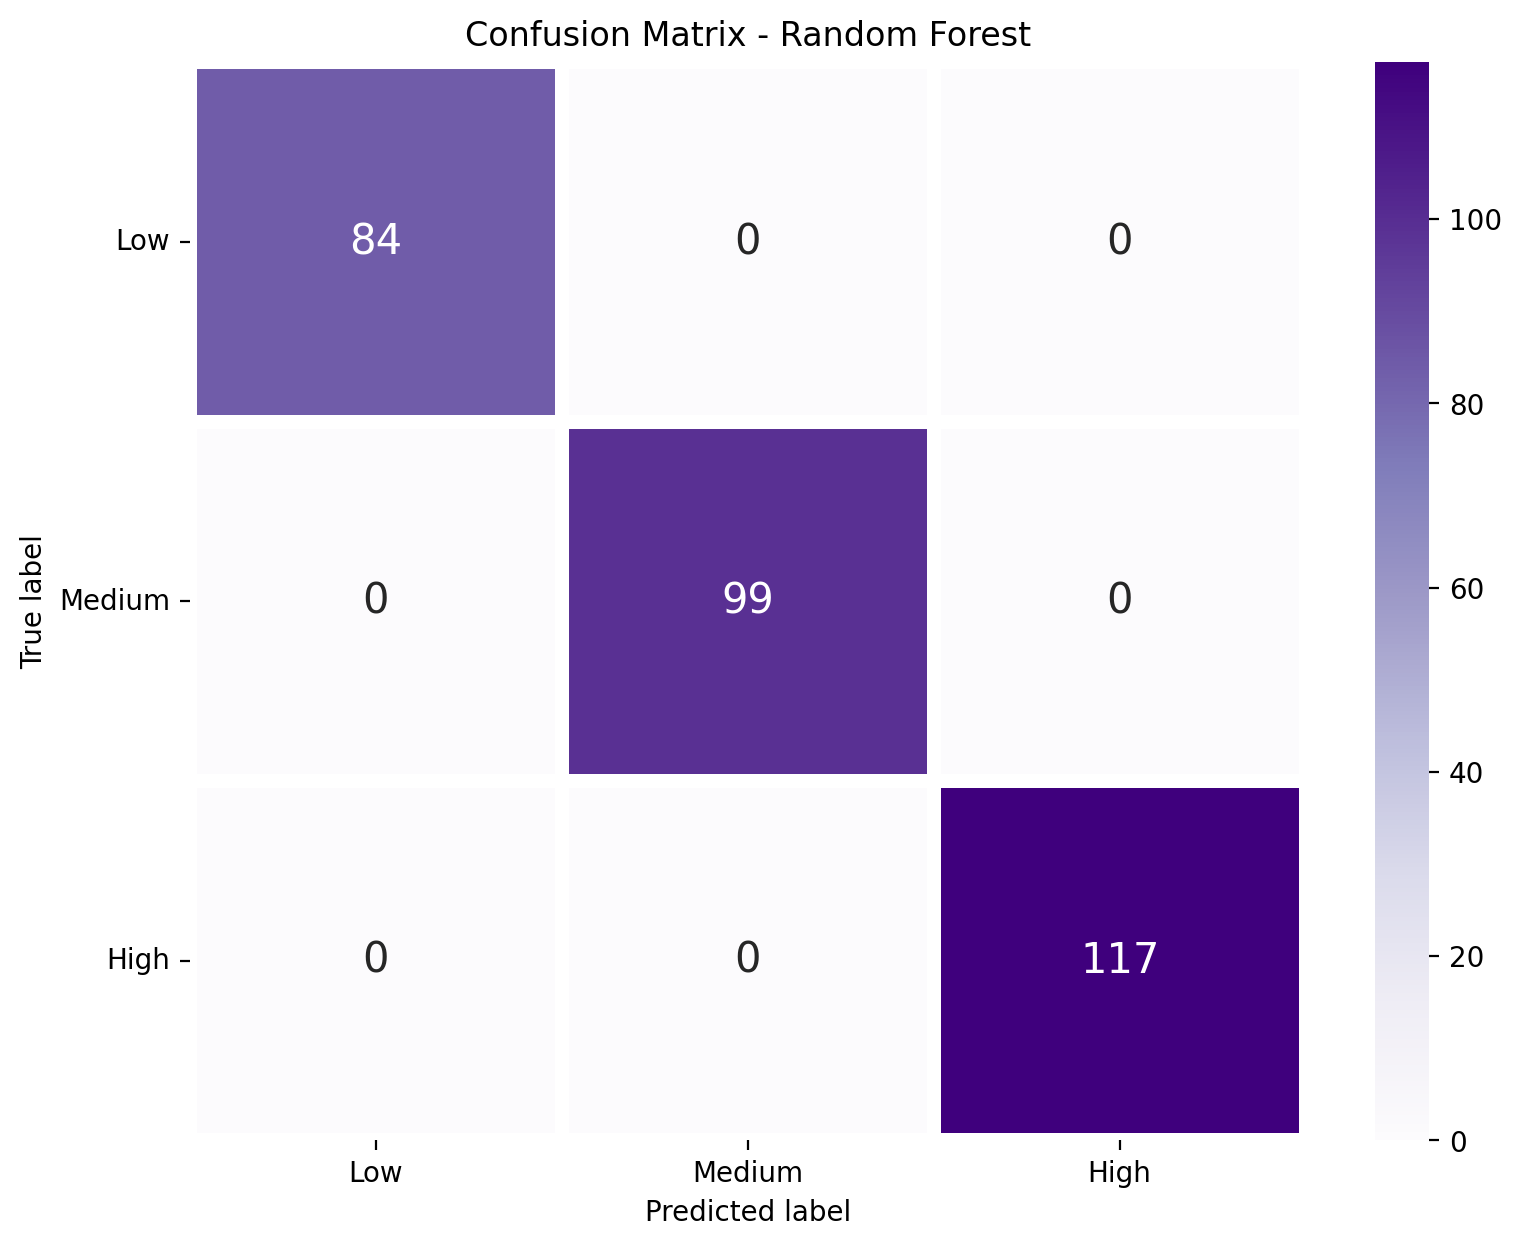

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [33]:
CM(y_test, RF_pred, col_names=['Low', 'Medium', 'High'], title='- Random Forest', cmap='Purples')

# Classification report for test data and predictions
ml_accuracies['Random Forest'] = accuracy_score(y_test, RF_pred)
print(classification_report(y_test, RF_pred))

In [34]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions using Naive Bayes
nb_pred = nb_model.predict(X_test)

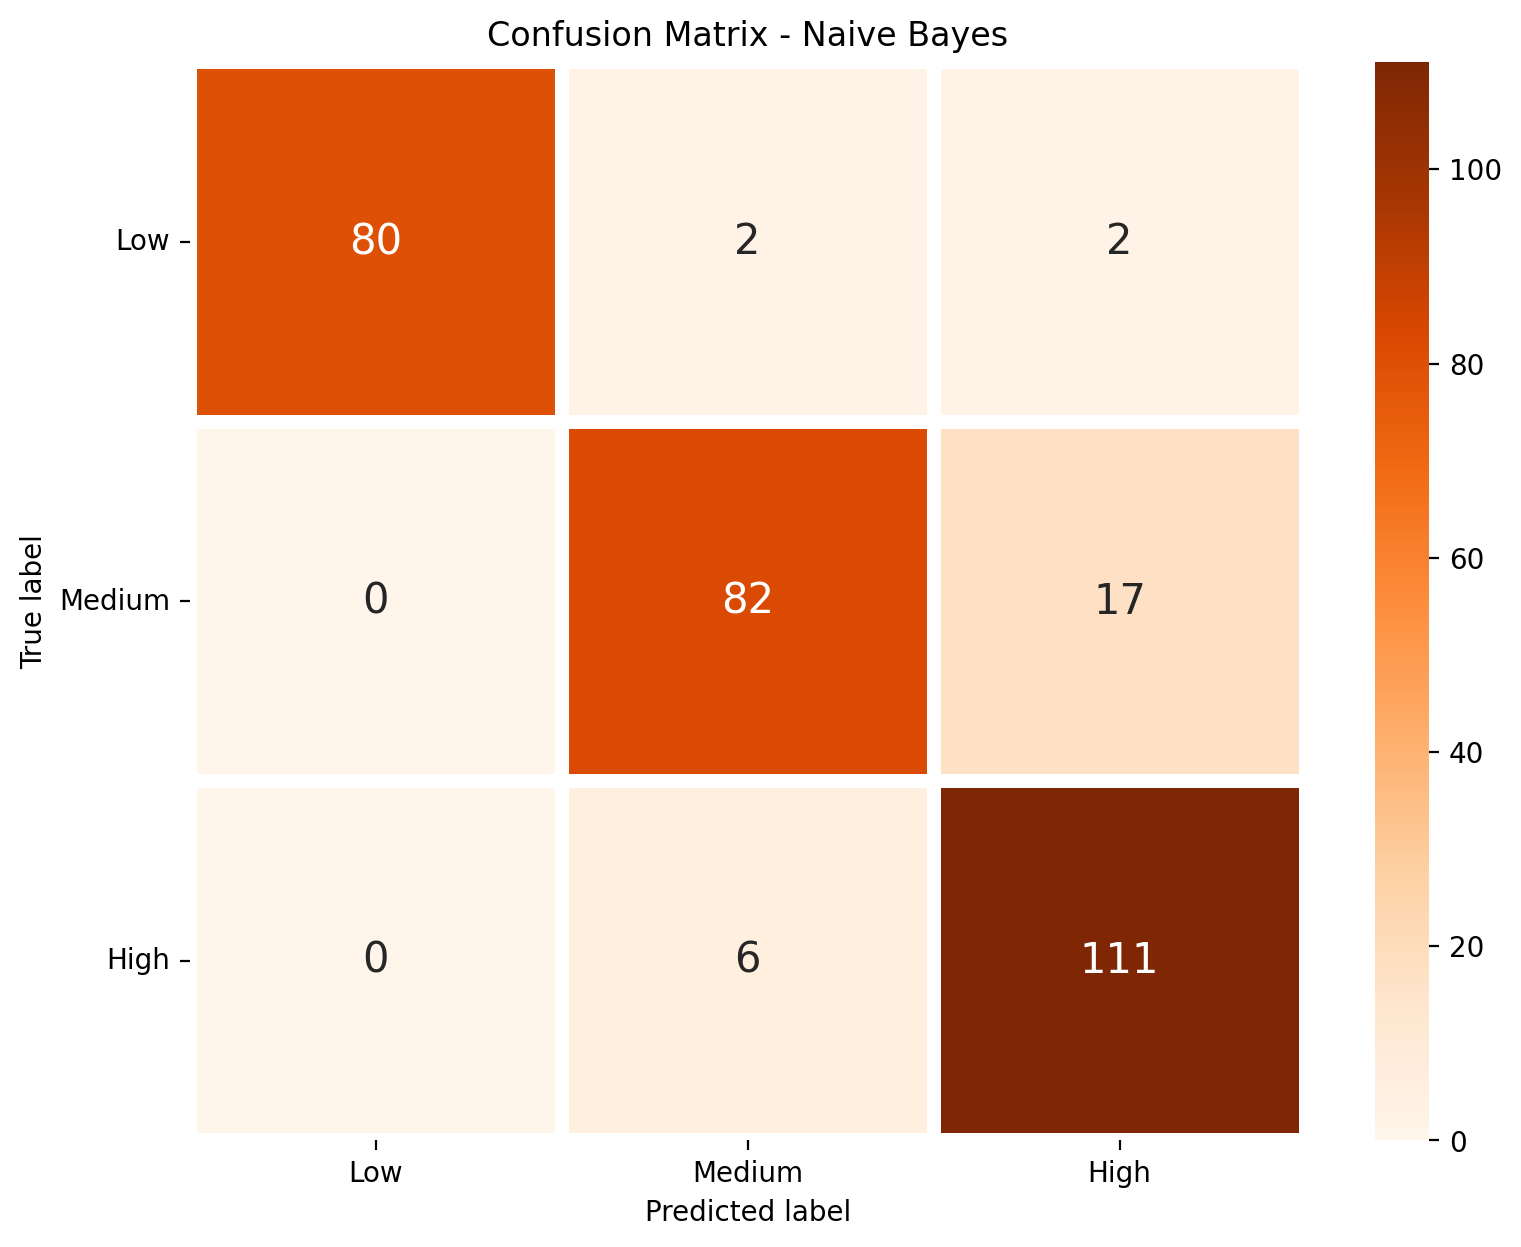

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        84
           1       0.91      0.83      0.87        99
           2       0.85      0.95      0.90       117

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [35]:
CM(y_test, nb_pred, col_names=['Low', 'Medium', 'High'], title='- Naive Bayes', cmap='Oranges')

# View the classification report for test data and predictions
ml_accuracies['Naive Bayes'] = accuracy_score(y_test, nb_pred)
print(classification_report(y_test, nb_pred))

In [36]:
# Train K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_model.fit(X_train, y_train)

# Predictions using Naive Bayes
knn_pred = knn_model.predict(X_test)

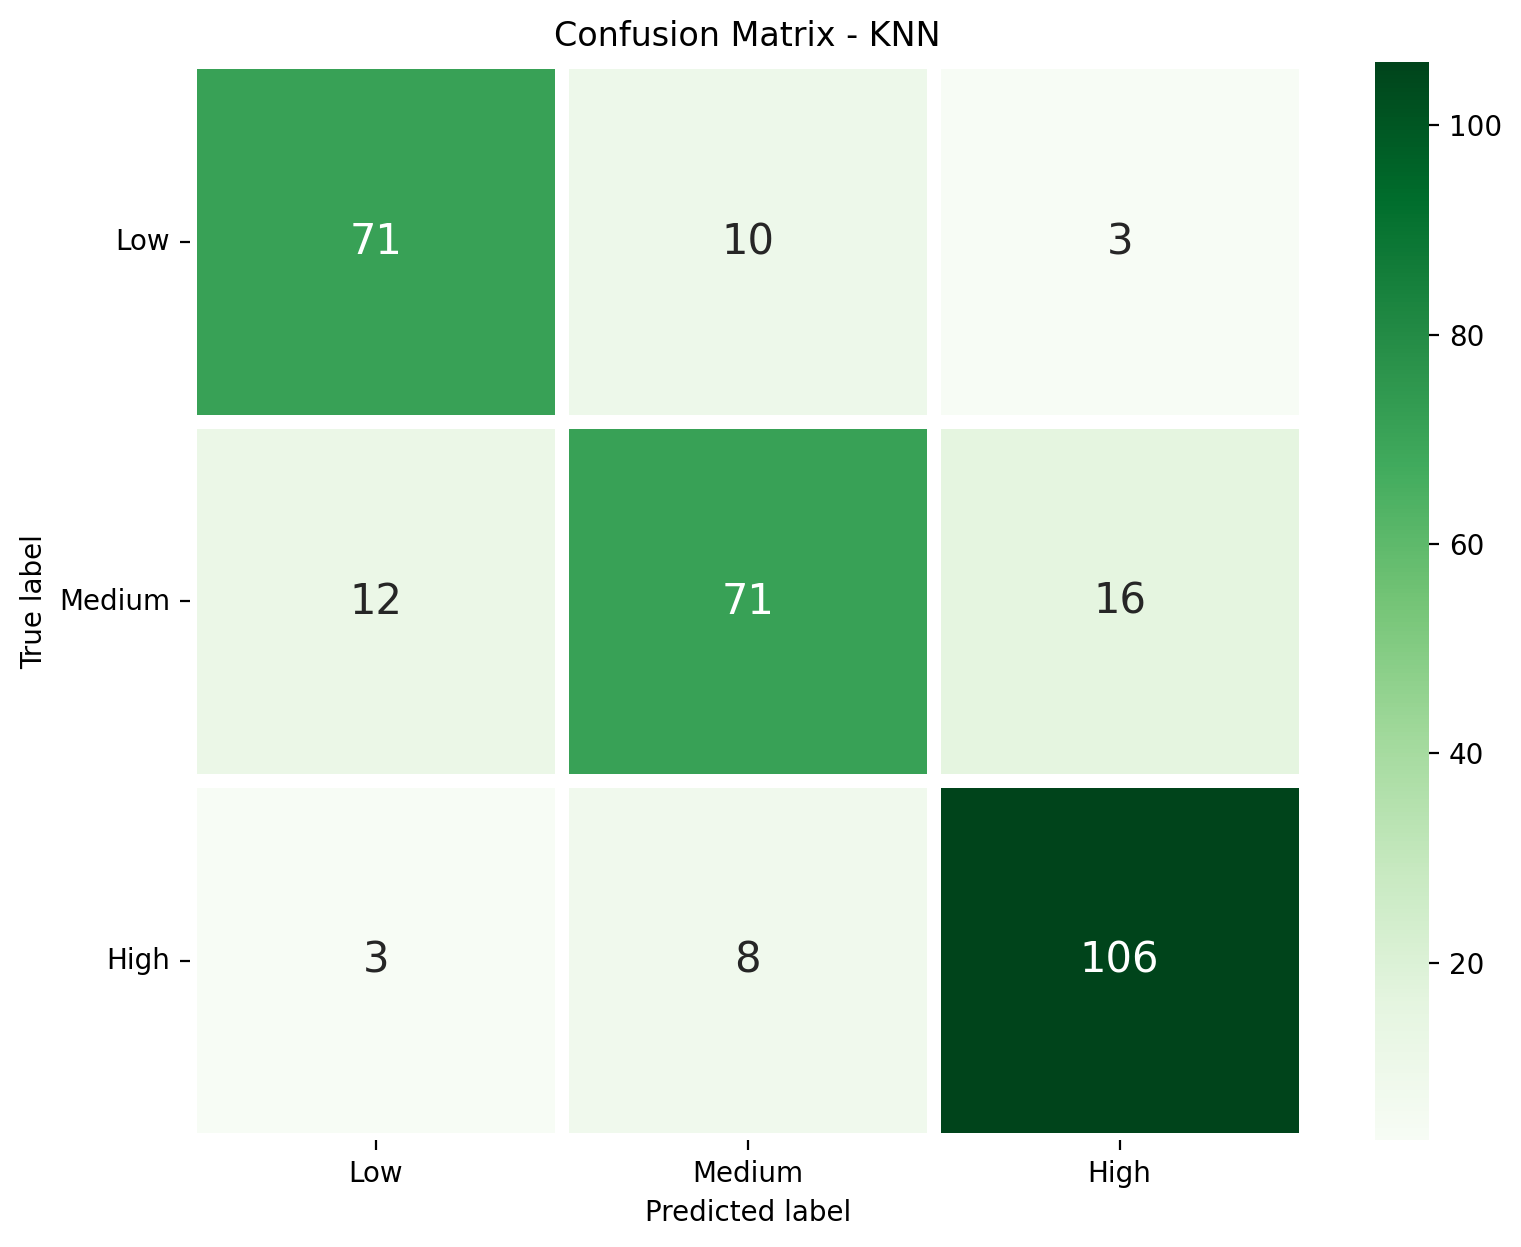

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        84
           1       0.80      0.72      0.76        99
           2       0.85      0.91      0.88       117

    accuracy                           0.83       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.83      0.83      0.82       300



In [37]:
CM(y_test, knn_pred, col_names=['Low', 'Medium', 'High'], title='- KNN', cmap='Greens')

# View the classification report for test data and predictions
ml_accuracies['KNN'] = accuracy_score(y_test, knn_pred)
print(classification_report(y_test, knn_pred))

In [28]:
svm_model = SVC(C=0.5, kernel='linear')
svm_model.fit(X_train, y_train)

# Predictions using Support Vector Machines
svm_pred = svm_model.predict(X_test)

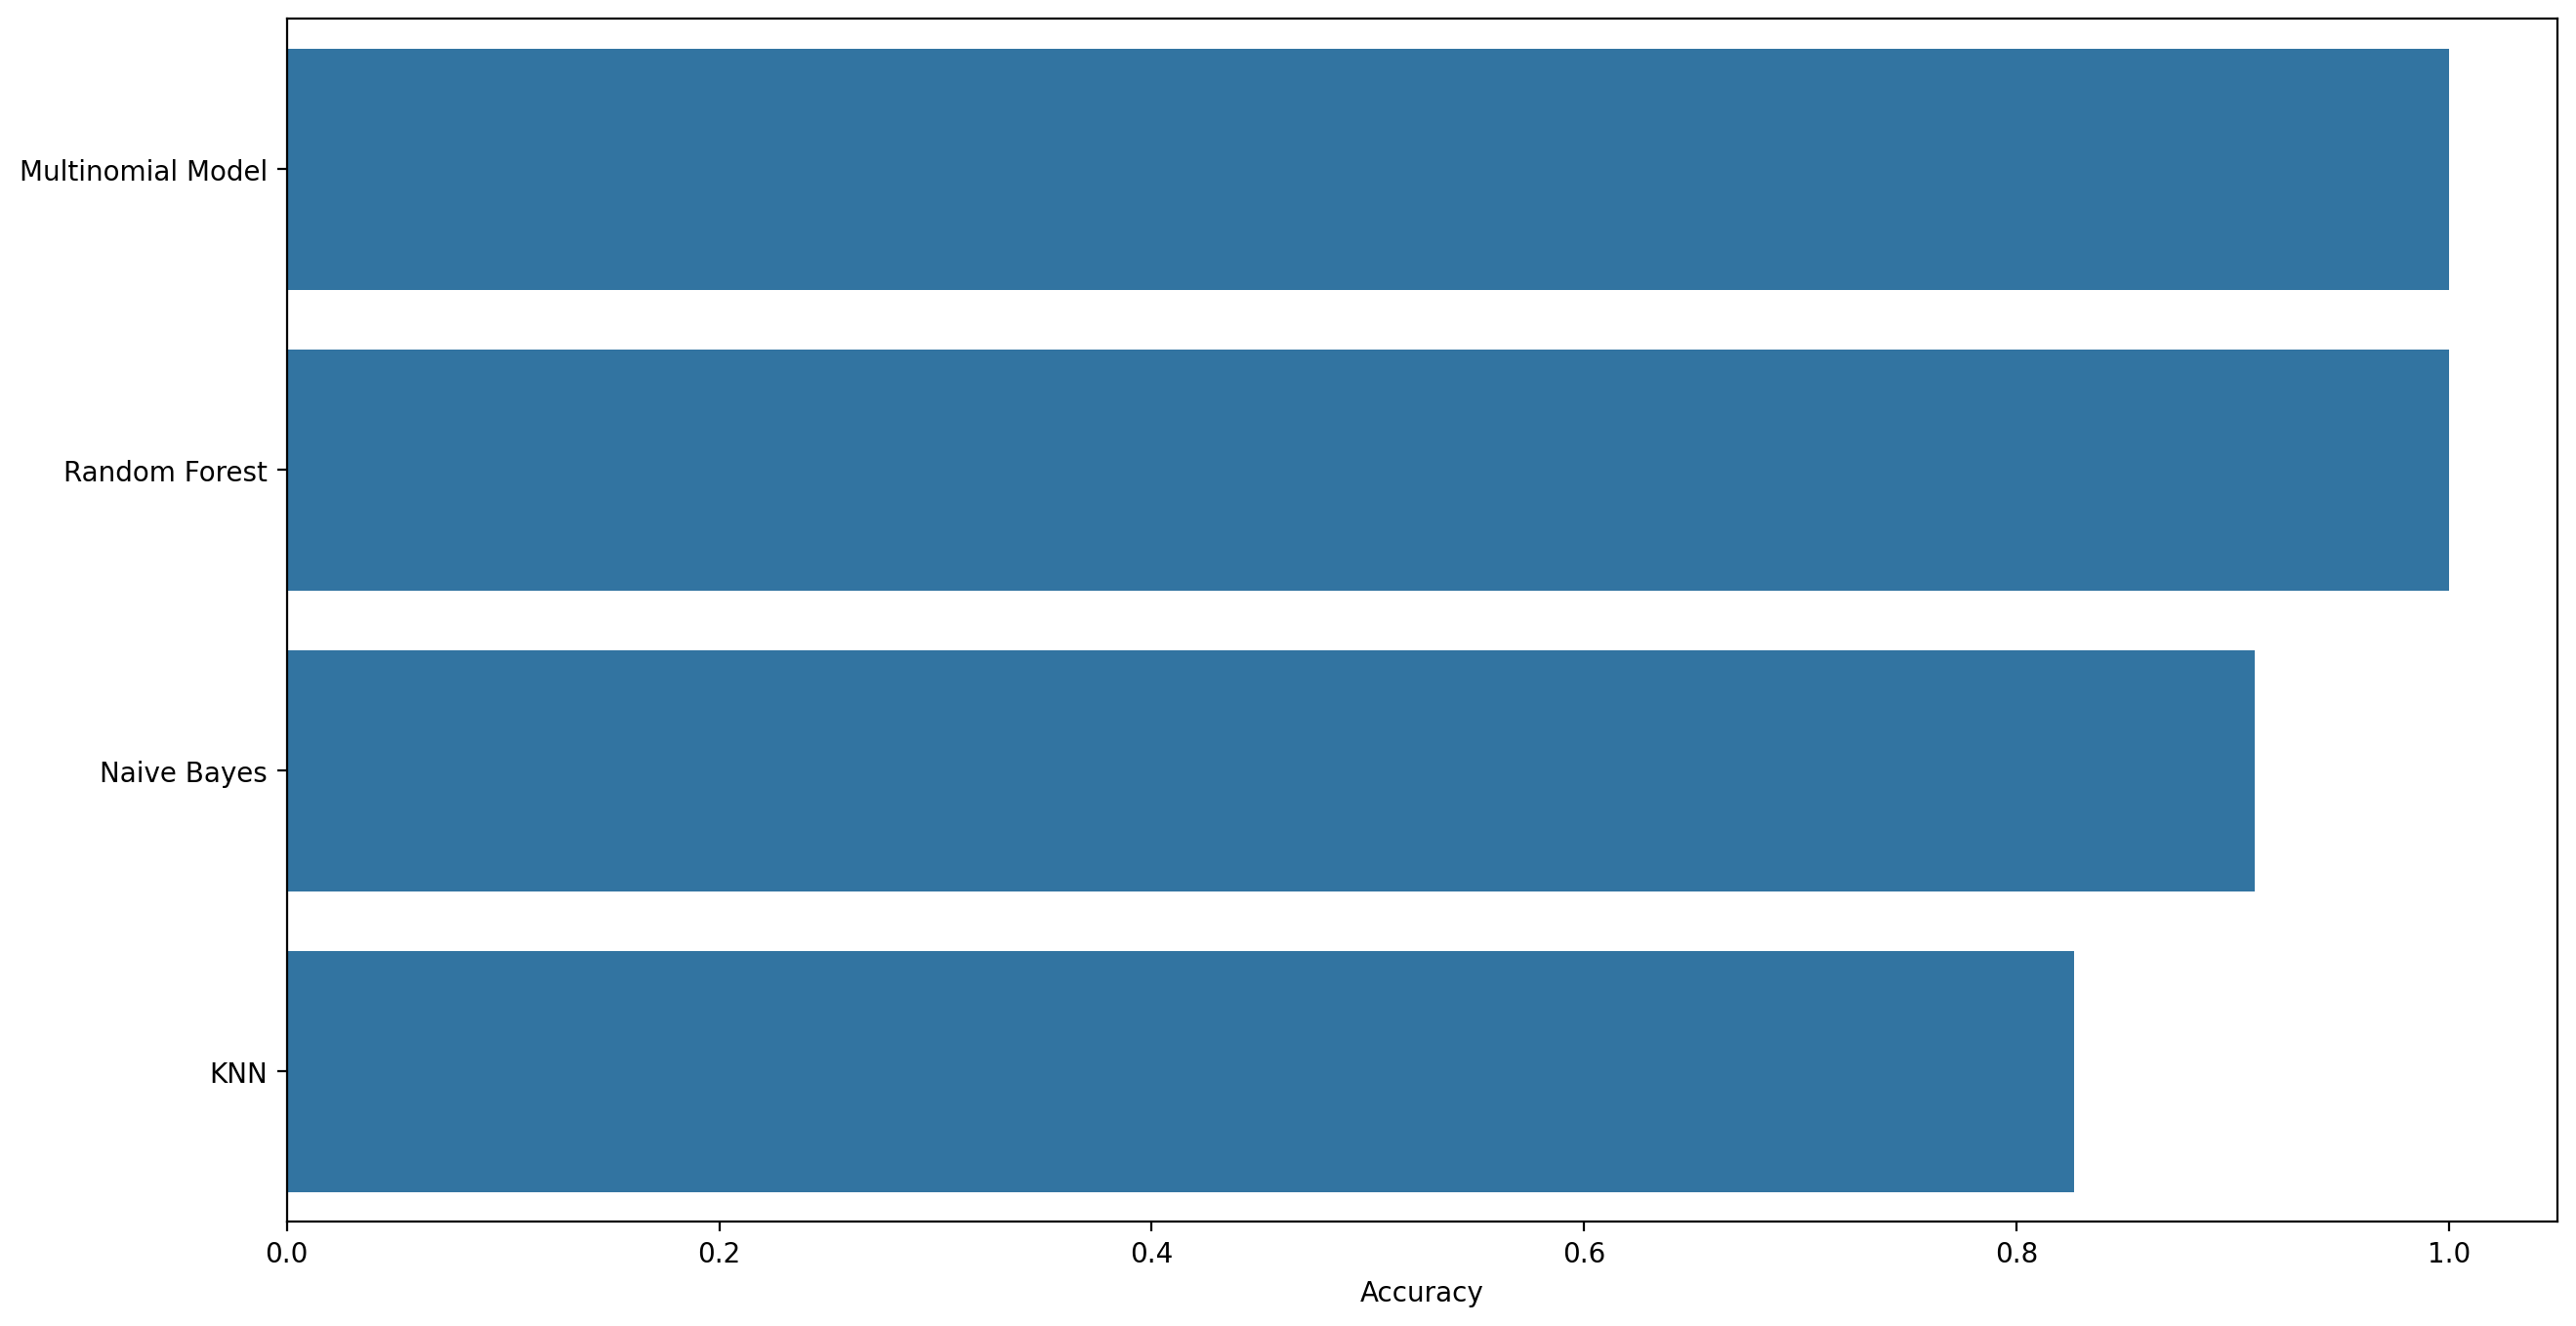

In [38]:
plt.figure(figsize=(15, 8))
sns.barplot(
    x=list(ml_accuracies.values()),
    y=list(ml_accuracies.keys()),
)
plt.xlabel('Accuracy')
plt.show()